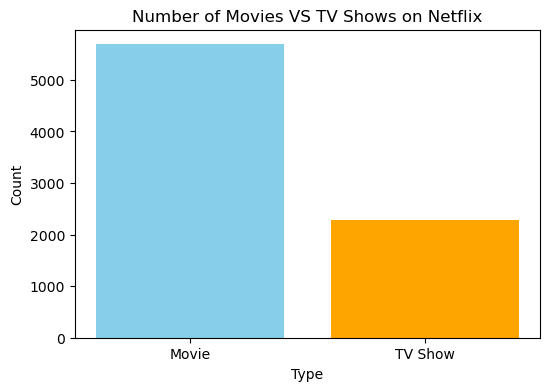

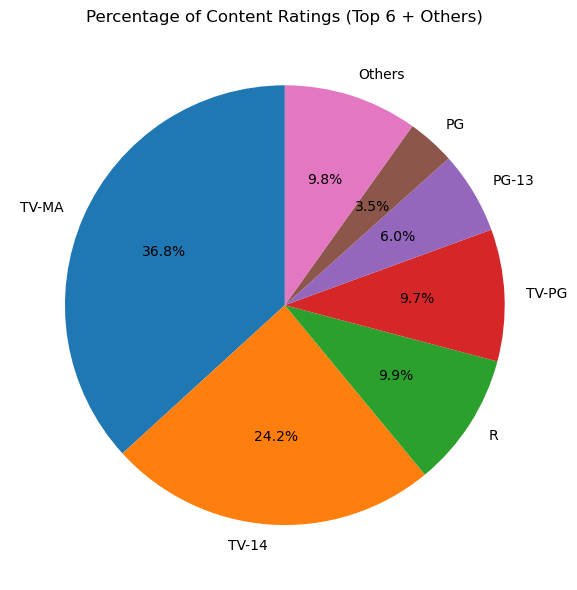

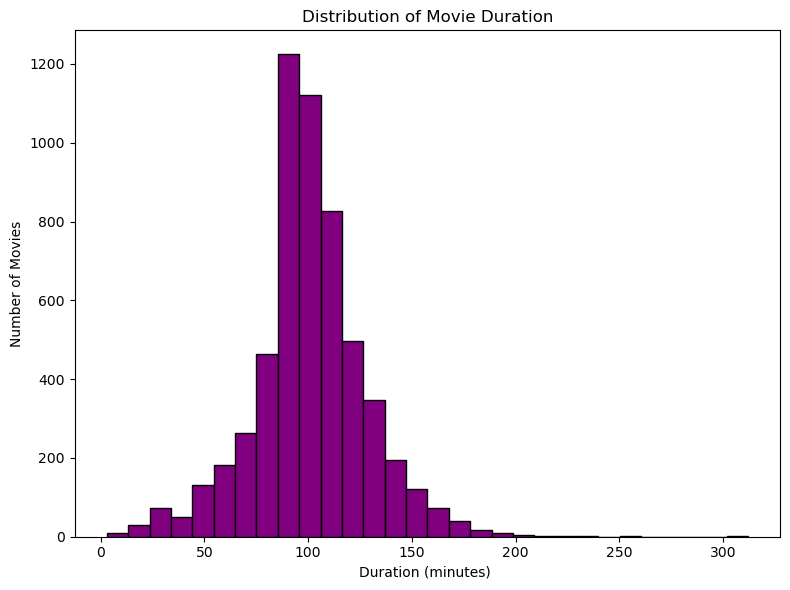

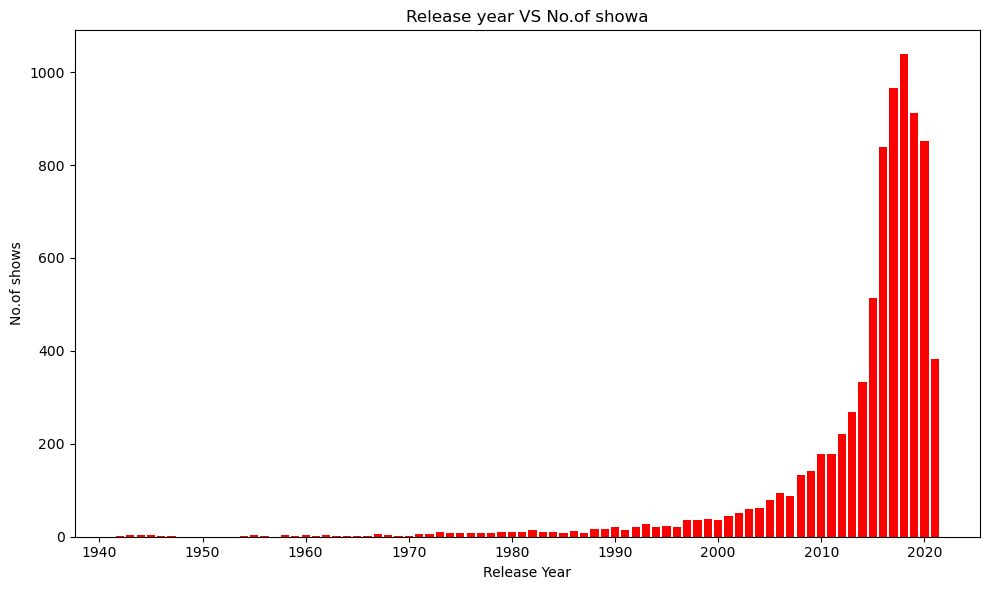

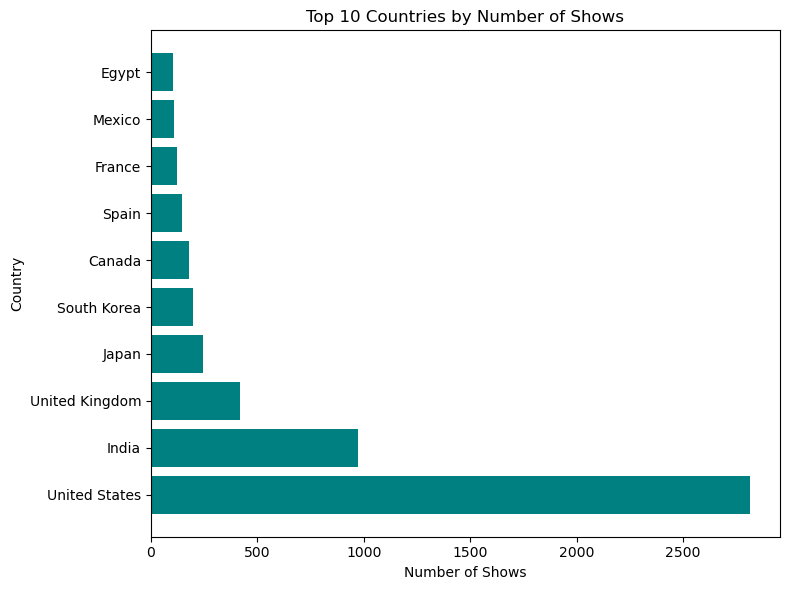

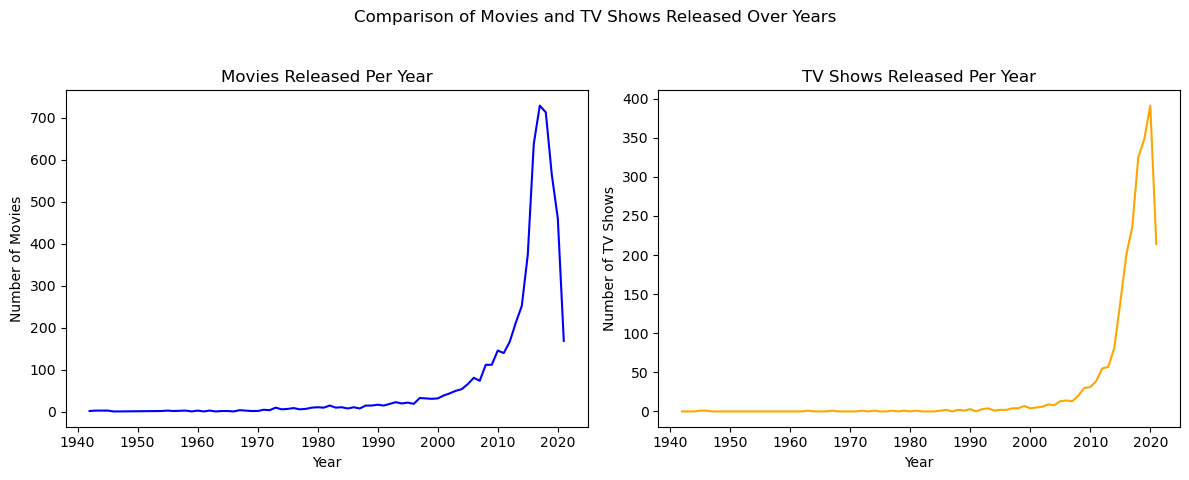

In [2]:
#step1: import libraries
import pandas as pd
import matplotlib.pyplot as plt

#step2: Load the data
df = pd.read_csv('netflix_titles.csv')

#step-3: Clean Data
df = df.dropna(subset = ['type', 'release_year','rating', 'country', 'duration'])

#step-4: Count of movies vs tv shows
type_counts = df['type'].value_counts()
plt.figure(figsize=(6, 4))  
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number of Movies VS TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

#step-5: Rating Distribution
rating_counts = df['rating'].value_counts()
# Group top 6 ratings, rest as "Others"
top_n = 6
top_ratings = rating_counts[:top_n]
others = rating_counts[top_n:].sum()
rating_data = top_ratings.copy()
rating_data['Others'] = others
plt.figure(figsize=(8, 6))
plt.pie(rating_data.values,
        labels=rating_data.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10})  # Adjust font size
plt.title('Percentage of Content Ratings (Top 6 + Others)')
plt.tight_layout()
plt.show()

#Step-6: Movie Duration
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df ['duration_int'], bins=30, color='purple',edgecolor='black')
plt.title( 'Distribution of Movie Duration' ) 
plt.xlabel( 'Duration (minutes) ')
plt.ylabel( 'Number of Movies')
plt.tight_layout ()
plt.savefig ('movie_duration_histogram.png')
plt.show()

#Step-5: Release Years
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.bar(release_counts.index, release_counts.values, color = 'red')
plt.title( 'Release year VS No.of showa' ) 
plt.xlabel( 'Release Year')
plt.ylabel( 'No.of shows')
plt.tight_layout ()
plt.savefig ('release year scatter.png')
plt.show()

#Step-6: Plot for Top 10 Countries
country_counts = df ['country'].value_counts () .head (10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt. title('Top 10 Countries by Number of Shows') 
plt.xlabel( 'Number of Shows') 
plt.ylabel( 'Country')
plt.tight_layout ()
plt.savefig('top10_countries.png')
plt.show()

#Step-7: Movies vs Tv shows over year
content_by_year = df.groupby(['release_year', 'type']).size().unstack(). fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,5))

# First subplot: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# Second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit suptitle
plt.savefig('movies_tv_shows_comparison.png')
plt.show()